___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [53]:
df = pd.read_csv("Ready_to_ML.csv")

In [54]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,Alloy wheels,1270.0,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,Dealer,1.0,1.0,0.0,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,Dealer,1991.0,8.0,162.0,4WD,Alloy wheels,1555.0,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Sport seats,1455.0,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Alloy wheels,1545.0,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [55]:
pd.DataFrame(df['type'].value_counts())

,type
Used,23367
Demonstration,1405
Pre-registered,1370
Employee's car,569


In [56]:
df.columns

Index(['make_model', 'make', 'location', 'price', 'body_type', 'type',
       'warranty', 'mileage', 'gearbox', 'fuel_type', 'seller', 'engine_size',
       'gears', 'co_emissions', 'drivetrain', 'extras', 'empty_weight',
       'full_service_history', 'upholstery', 'previous_owner',
       'energy_efficiency_class', 'age', 'power_kW', 'cons_avg',
       'comfort_&_convenience_Package', 'entertainment_&_media_Package',
       'safety_&_security_Package'],
      dtype='object')

In [57]:
pd.DataFrame(df['body_type'].value_counts())

,body_type
Station wagon,5391
Off-Road/Pick-up,5357
Compact,5303
Sedan,4947
Coupe,2942
Convertible,2771


In [58]:
pd.DataFrame(df['make_model'].value_counts())

,make_model
Renault Megane,832
SEAT Leon,784
Volvo V40,740
Dacia Sandero,730
Hyundai i30,706
...,...
Toyota Prius+,1
Peugeot iOn,1
Peugeot 106,1
Mercedes-Benz SLR,1


In [59]:
for column in df.columns:
    # Use value_counts() to count the occurrences of each element in the column
    column_counts = df[column].value_counts()
    
    # Print the column name and its count
    print(f"Column '{column}':")
    print(column_counts)
    print()

Column 'make_model':
Renault Megane       832
SEAT Leon            784
Volvo V40            740
Dacia Sandero        730
Hyundai i30          706
                    ... 
Toyota Prius+          1
Peugeot iOn            1
Peugeot 106            1
Mercedes-Benz SLR      1
Renault R 11           1
Name: make_model, Length: 490, dtype: int64

Column 'make':
Volvo            3343
Mercedes-Benz    2288
Peugeot          2255
Renault          2229
Ford             2164
Opel             2107
Fiat             2010
Nissan           1914
Hyundai          1834
Toyota           1753
SEAT             1725
Skoda            1557
Dacia            1532
Name: make, dtype: int64

Column 'location':
Av. Laboral, 10,  28021 MADRID, ES                            306
Luckenwalder Berg 5,  14913 Jüterbog, DE                      170
Ctra. del Mig, 96,,  08097 L'Hospitalet de Llobregat, ES      143
9 boulevard Jules Ferry,  75011 Paris, FR                     136
Neuenhofstr. 77,  52078 Aachen, DE               

In [60]:
display(df.describe(include="O"))

,make_model,make,location,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,extras,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
count,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711
unique,490,13,7178,6,4,2,3,4,2,3,9021,2,2,2,3,2,3
top,Renault Megane,Volvo,"Av. Laboral, 10, 28021 MADRID, ES",Station wagon,Used,No,Manual,Benzine,Dealer,Front,Alloy wheels,No,Cloth,efficient,Standard,Standard,Safety Premium Package
freq,832,3343,306,5391,23367,13480,15669,16862,25103,20415,5797,14628,14219,17154,17875,16066,20797


In [61]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000
mean,23537.240538,68863.811928,1708.964696,5.820112,129.525841,1425.205421,1.460073,5.166448,118.414380,5.531746
std,20811.986347,62794.146434,772.439713,1.416920,54.255203,307.386873,0.852665,4.654800,65.642485,2.220290
min,490.000000,0.000000,0.000000,1.000000,0.000000,347.000000,1.000000,0.000000,33.000000,0.000000
25%,12490.000000,19155.000000,1248.000000,5.000000,105.000000,1228.000000,1.000000,2.000000,80.000000,4.300000
50%,18440.000000,54000.000000,1595.000000,6.000000,123.000000,1375.000000,1.000000,4.000000,100.000000,5.200000
75%,28330.000000,100675.000000,1969.000000,6.000000,150.000000,1597.000000,2.000000,7.000000,135.000000,6.400000
max,549000.000000,667128.000000,6300.000000,8.000000,399.000000,3150.000000,9.000000,20.000000,450.000000,18.300000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

C:\Users\habob\AppData\Local\Temp\ipykernel_26360\710016527.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')


<Axes: >

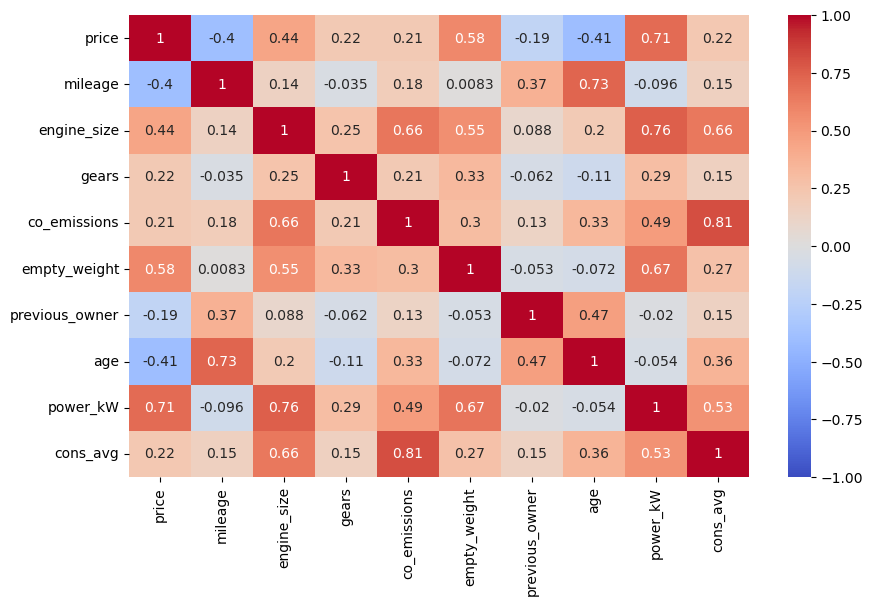

In [63]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

In [64]:
df.columns

Index(['make_model', 'make', 'location', 'price', 'body_type', 'type',
       'warranty', 'mileage', 'gearbox', 'fuel_type', 'seller', 'engine_size',
       'gears', 'co_emissions', 'drivetrain', 'extras', 'empty_weight',
       'full_service_history', 'upholstery', 'previous_owner',
       'energy_efficiency_class', 'age', 'power_kW', 'cons_avg',
       'comfort_&_convenience_Package', 'entertainment_&_media_Package',
       'safety_&_security_Package'],
      dtype='object')

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

In [65]:
cars = df.drop(["make_model", "location", "type", "seller",
                "previous_owner", "comfort_&_convenience_Package", "safety_&_security_Package", "co_emissions"], axis=1)
cars.head()

,make,price,body_type,warranty,mileage,gearbox,fuel_type,engine_size,gears,drivetrain,extras,empty_weight,full_service_history,upholstery,energy_efficiency_class,age,power_kW,cons_avg,entertainment_&_media_Package
0,Mercedes-Benz,16950.0,Compact,Yes,120200.0,Manual,Diesel,1595.0,5.0,Front,Alloy wheels,1270.0,No,Cloth,efficient,6.0,75.0,3.800,Standard
1,Mercedes-Benz,80900.0,Compact,Yes,5000.0,Automatic,Electric,1.0,1.0,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0,No,Part/Full Leather,efficient,0.0,215.0,2.359,Plus
2,Mercedes-Benz,69900.0,Compact,Yes,18900.0,Automatic,Benzine,1991.0,8.0,4WD,Alloy wheels,1555.0,No,Part/Full Leather,unefficient,2.0,310.0,8.400,Standard
3,Mercedes-Benz,46990.0,Compact,Yes,18995.0,Automatic,Benzine,1991.0,7.0,4WD,Sport seats,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.300,Standard
4,Mercedes-Benz,16800.0,Compact,Yes,197000.0,Automatic,Diesel,2143.0,7.0,4WD,Alloy wheels,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.900,Standard


In [66]:
column_name = 'gearbox'

# Define the conversion criteria
# Replace 'type1', 'type2', and 'type3' with the actual types in your column
type1 = 'Manual'
type2 = 'Automatic'
type3 = 'Semi-automatic'

In [67]:
# Define the conversion function
def convert_type(value):
    if value == type1:
        return 'Manual'  # Replace 'new_type1' with the desired new type for type1
    elif value == type2 or value == type3:
        return 'Other'  # Replace 'new_type2' with the desired new type for type2 and type3
    else:
        return value

In [68]:
# Apply the conversion function to the column
cars['gearbox'] = cars['gearbox'].apply(convert_type)

# Print the updated column
print(cars['gearbox'])

0        Manual
1         Other
2         Other
3         Other
4         Other
          ...  
26706     Other
26707     Other
26708    Manual
26709     Other
26710     Other
Name: gearbox, Length: 26711, dtype: object


In [69]:
pd.DataFrame(cars['gearbox'].value_counts())

,gearbox
Manual,15669
Other,11042


### Converting the Extras feature from object to numeric

In [70]:
cars['extras_nu'] = cars['extras'].apply(lambda x: x.count(',')+1 if x.count(',') > 0 else 1)
cars = cars.drop(['extras'], axis=1)
# Print the updated DataFrame
cars['extras_nu'].head(10)

0    1
1    6
2    1
3    1
4    1
5    7
6    3
7    2
8    1
9    1
Name: extras_nu, dtype: int64

In [71]:
cars.head()

,make,price,body_type,warranty,mileage,gearbox,fuel_type,engine_size,gears,drivetrain,empty_weight,full_service_history,upholstery,energy_efficiency_class,age,power_kW,cons_avg,entertainment_&_media_Package,extras_nu
0,Mercedes-Benz,16950.0,Compact,Yes,120200.0,Manual,Diesel,1595.0,5.0,Front,1270.0,No,Cloth,efficient,6.0,75.0,3.800,Standard,1
1,Mercedes-Benz,80900.0,Compact,Yes,5000.0,Other,Electric,1.0,1.0,4WD,2355.0,No,Part/Full Leather,efficient,0.0,215.0,2.359,Plus,6
2,Mercedes-Benz,69900.0,Compact,Yes,18900.0,Other,Benzine,1991.0,8.0,4WD,1555.0,No,Part/Full Leather,unefficient,2.0,310.0,8.400,Standard,1
3,Mercedes-Benz,46990.0,Compact,Yes,18995.0,Other,Benzine,1991.0,7.0,4WD,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.300,Standard,1
4,Mercedes-Benz,16800.0,Compact,Yes,197000.0,Other,Diesel,2143.0,7.0,4WD,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.900,Standard,1


## multicollinearity control

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
df_vif = cars.copy()
df_predictors = cars.drop('price', axis=1)
predictors = df_predictors.columns

vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

C:\Users\habob\AppData\Local\Temp\ipykernel_26360\1614411968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=cars.corr(), annot=True)


<Axes: >

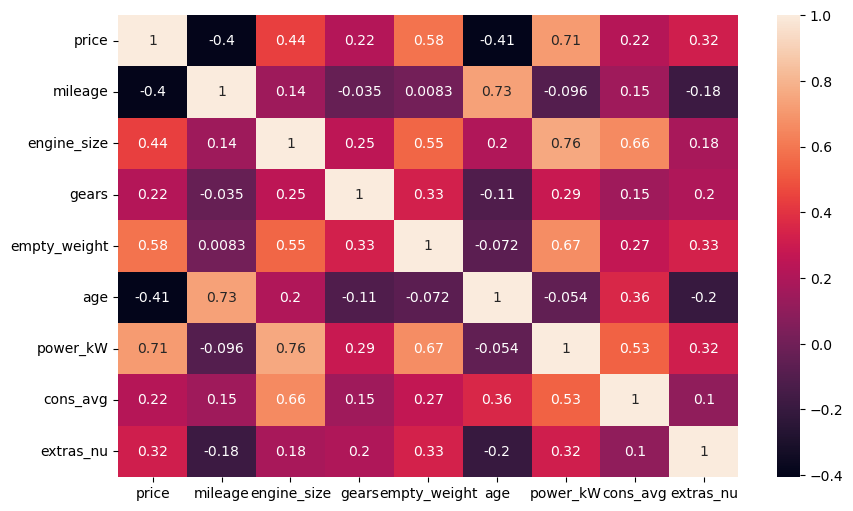

In [74]:
sns.heatmap(data=cars.corr(), annot=True)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [75]:
cars.describe(include='O')

,make,body_type,warranty,gearbox,fuel_type,drivetrain,full_service_history,upholstery,energy_efficiency_class,entertainment_&_media_Package
count,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711
unique,13,6,2,2,4,3,2,2,2,2
top,Volvo,Station wagon,No,Manual,Benzine,Front,No,Cloth,efficient,Standard
freq,3343,5391,13480,15669,16862,20415,14628,14219,17154,16066


### Train | Test Split

In [76]:
from sklearn.model_selection import train_test_split

X = cars.drop('price', axis=1)
y = cars['price']

In [77]:
X

,make,body_type,warranty,mileage,gearbox,fuel_type,engine_size,gears,drivetrain,empty_weight,full_service_history,upholstery,energy_efficiency_class,age,power_kW,cons_avg,entertainment_&_media_Package,extras_nu
0,Mercedes-Benz,Compact,Yes,120200.0,Manual,Diesel,1595.0,5.0,Front,1270.0,No,Cloth,efficient,6.0,75.0,3.800,Standard,1
1,Mercedes-Benz,Compact,Yes,5000.0,Other,Electric,1.0,1.0,4WD,2355.0,No,Part/Full Leather,efficient,0.0,215.0,2.359,Plus,6
2,Mercedes-Benz,Compact,Yes,18900.0,Other,Benzine,1991.0,8.0,4WD,1555.0,No,Part/Full Leather,unefficient,2.0,310.0,8.400,Standard,1
3,Mercedes-Benz,Compact,Yes,18995.0,Other,Benzine,1991.0,7.0,4WD,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.300,Standard,1
4,Mercedes-Benz,Compact,Yes,197000.0,Other,Diesel,2143.0,7.0,4WD,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.900,Standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26706,Volvo,Sedan,Yes,40345.0,Other,Diesel,1969.0,8.0,4WD,2077.0,No,Part/Full Leather,efficient,3.0,288.0,2.000,Standard,1
26707,Volvo,Sedan,No,145000.0,Other,Benzine,2435.0,5.0,Front,1357.0,Yes,Cloth,efficient,18.0,125.0,9.100,Standard,2
26708,Volvo,Sedan,Yes,96000.0,Manual,Diesel,1560.0,6.0,Front,1356.0,Yes,Cloth,unefficient,11.0,84.0,3.800,Standard,3
26709,Volvo,Sedan,Yes,94343.0,Other,Benzine,1969.0,8.0,4WD,1617.0,Yes,Part/Full Leather,efficient,5.0,187.0,6.500,Standard,2


In [78]:
y

0        16950.0
1        80900.0
2        69900.0
3        46990.0
4        16800.0
          ...   
26706    37600.0
26707     5499.0
26708     7300.0
26709    29900.0
26710     4440.0
Name: price, Length: 26711, dtype: float64

## OneHotEncoder

### Example

In [79]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [80]:
data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,bed,6
6,good,7
7,good,8
8,bad,9
9,car,10


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)

In [82]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,good


In [83]:
X_test

,col
7,good
8,bad
9,car


In [84]:
enc.fit_transform(X_train)
# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.


C:\Users\habob\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [85]:
enc.transform(X_test)
# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1, while the non-observations (car) are converted to 0.


array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.]])

## OrdinalEncoder

### Example

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [86]:
cars.describe(include='O')

,make,body_type,warranty,gearbox,fuel_type,drivetrain,full_service_history,upholstery,energy_efficiency_class,entertainment_&_media_Package
count,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711
unique,13,6,2,2,4,3,2,2,2,2
top,Volvo,Station wagon,No,Manual,Benzine,Front,No,Cloth,efficient,Standard
freq,3343,5391,13480,15669,16862,20415,14628,14219,17154,16066


In [87]:
X = cars.drop('price', axis=1)
y = cars.price

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

# OnHotEncoding

In [101]:
categorical_columns = ['make', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'drivetrain', 'full_service_history',
                       'upholstery','energy_efficiency_class', 'entertainment_&_media_Package']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')


In [102]:
X_train_en = pd.concat([X_train.drop(categorical_columns, axis=1), encoded_df], axis=0)

In [103]:
cars.columns

Index(['make', 'price', 'body_type', 'warranty', 'mileage', 'gearbox',
       'fuel_type', 'engine_size', 'gears', 'drivetrain', 'empty_weight',
       'full_service_history', 'upholstery', 'energy_efficiency_class', 'age',
       'power_kW', 'cons_avg', 'entertainment_&_media_Package', 'extras_nu'],
      dtype='object')

In [104]:
cars.describe().columns

Index(['price', 'mileage', 'engine_size', 'gears', 'empty_weight', 'age',
       'power_kW', 'cons_avg', 'extras_nu'],
      dtype='object')

In [105]:
numerical_columns = cars.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Print the numerical column names
print(numerical_columns)

['price', 'mileage', 'engine_size', 'gears', 'empty_weight', 'age', 'power_kW', 'cons_avg', 'extras_nu']


In [122]:
numerical_columns = ['mileage', 'engine_size', 'gears', 'empty_weight', 'age',
       'power_kW', 'cons_avg', 'extras_nu']

In [123]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [124]:
# scaler = StandardScaler()

In [125]:
from sklearn.compose import make_column_transformer
columns_trans = make_column_transformer(
     (StandardScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns), remainder = 'passthrough')

In [126]:
columns_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['mileage', 'engine_size', 'gears',
                                  'empty_weight', 'age', 'power_kW', 'cons_avg',
                                  'extras_nu']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['make', 'body_type', 'warranty', 'gearbox',
                                  'fuel_type', 'drivetrain',
                                  'full_service_history', 'upholstery',
                                  'energy_efficiency_class',
                                  'entertainment_&_media_Package'])])

In [129]:
X_train_trans = columns_trans.fit_transform(X_train)

In [130]:
X_test_trans = columns_trans.transform(X_test)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [ ]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


## Cross Validate

## Prediction Error

## Residual Plot

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

## Cross Validation

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Cross Validation

## Finding best alpha for Lasso

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___